# Rice Image Classificaiton

### Importing dependencies

In [1]:
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pathlib import Path
from PIL import Image
from tensorflow.keras import layers
from sklearn import preprocessing


### Reading the Images

In [2]:
image_link = list(Path("D:\EDUCATION\Machine Learning\data\image\Rice_Image_Dataset").glob(r'**/*.jpg'))
image_name = [x.parents[0].stem for x in image_link]

image_label = preprocessing.LabelEncoder().fit_transform(image_name)


### Creating DataFrame

In [3]:
import numpy as np
df = pd.DataFrame()
df['link'] = np.array(image_link, dtype = np.str)
df['name'] = image_name
df['label'] = image_label

C:\Users\zaihd\AppData\Local\Temp\ipykernel_9932\3006758444.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['link'] = np.array(image_link, dtype = np.str)


In [4]:
df.head()

,link,name,label
0,D:\EDUCATION\Machine Learning\data\image\Rice_...,Arborio,0
1,D:\EDUCATION\Machine Learning\data\image\Rice_...,Arborio,0
2,D:\EDUCATION\Machine Learning\data\image\Rice_...,Arborio,0
3,D:\EDUCATION\Machine Learning\data\image\Rice_...,Arborio,0
4,D:\EDUCATION\Machine Learning\data\image\Rice_...,Arborio,0


In [5]:
df['name'].unique()

array(['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'],
      dtype=object)

In [6]:
df['label'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

<AxesSubplot:>

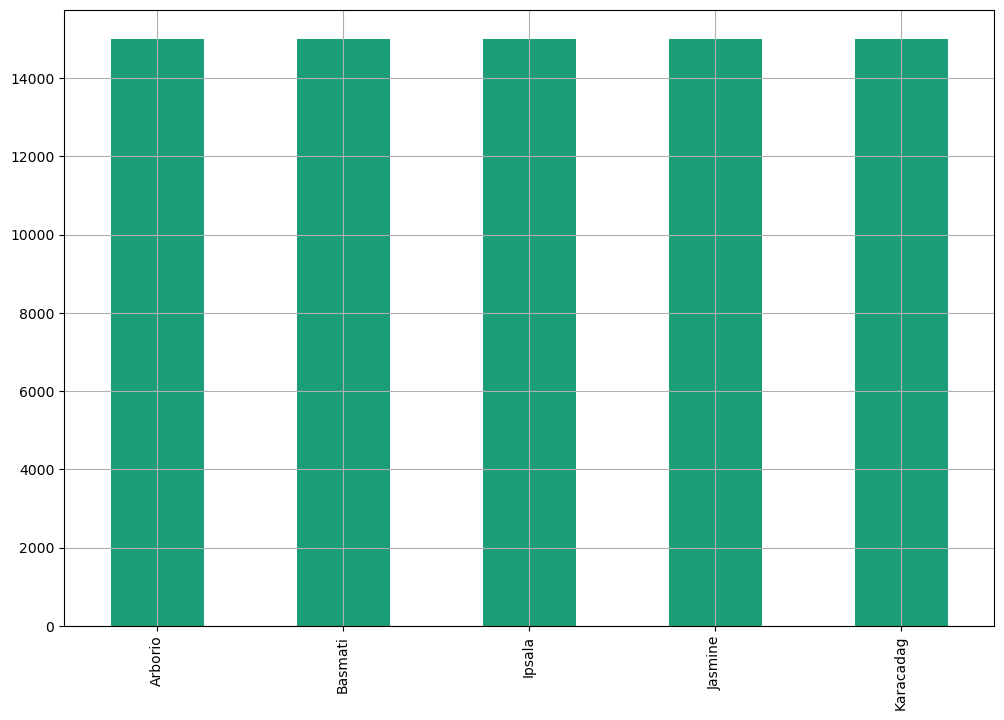

In [23]:
df.name.value_counts().plot(kind = 'bar', figsize = (12, 8), grid = True,  cmap=plt.colormaps['Dark2'])

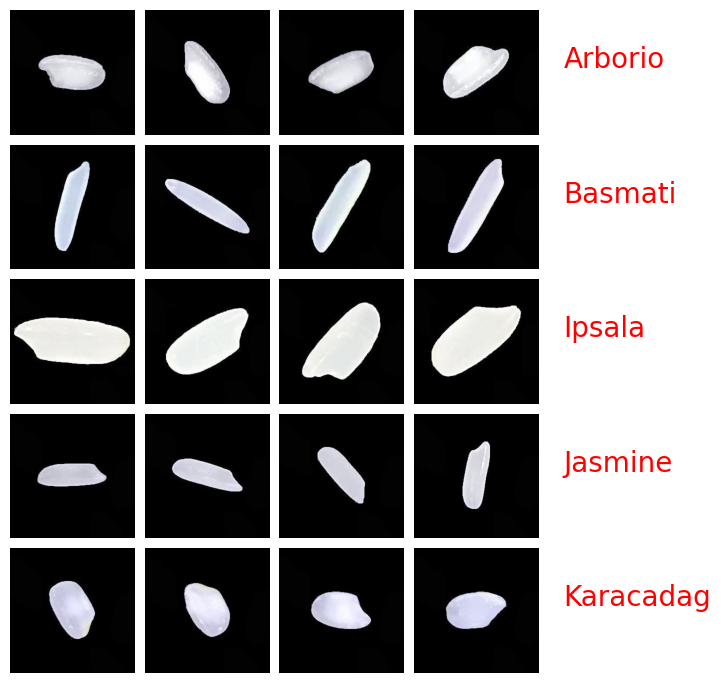

In [8]:
fig = plt.figure(1, figsize = (15,15))
grid = ImageGrid(fig, 121, nrows_ncols = (5,4), axes_pad = 0.10)
i = 0
for category_id, category in enumerate(df.name.unique()):
    for filepath in df[df['name'] == category]['link'].values[:4]:
        ax = grid[i]
        img = Image.open(filepath)
        ax.imshow(img)
        ax.axis('off')
        if i % 4 == 4-1:
            ax.text(300,100, category, verticalalignment = 'center', fontsize = 20, color ='red')
        i+=1
        
plt.show()

In [9]:
import splitfolders

In [10]:
splitfolders.ratio(r'D:\EDUCATION\Machine Learning\data\image\Rice_Image_Dataset', output = './', seed = 101,ratio = (.8,.1,.1))

In [11]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state = 1)

In [12]:
train_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = train_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical',
    subset = 'training'
)

test_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = test_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical'
)

Found 52500 validated image filenames belonging to 5 classes.
Found 22500 validated image filenames belonging to 5 classes.


### Building Model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape = (28, 28, 3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),tf.keras.layers.Conv2D(32, (3,3),activation = 'relu'),tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

### Training the model

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(train_images, epochs = 3)

Epoch 1/3
1641/1641 [==============================] - 832s 506ms/step - loss: 0.2734 - accuracy: 0.9335
Epoch 2/3
1641/1641 [==============================] - 202s 123ms/step - loss: 0.0769 - accuracy: 0.9744
Epoch 3/3
1641/1641 [==============================] - 70s 43ms/step - loss: 0.0602 - accuracy: 0.9801


In [16]:
model.evaluate(test_images)

704/704 [==============================] - 471s 670ms/step - loss: 0.0549 - accuracy: 0.9819


[0.054898135364055634, 0.9818666577339172]